In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import torchvision.models as models
import kagglehub
import os
import pandas as pd
import numpy as np
from datetime import timedelta
import math
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_error
import pickle

In [2]:
# Function to seperate 
def separate_dataset(dataset):
    # Initialize lists to hold data and labels
    data_list = []
    label_list = []

    # Iterate through each tuple in the dataset
    for data_tensor, label_tensor in dataset:
        # Convert tensors to NumPy arrays and append to the respective lists
        data_list.append(data_tensor.cpu().numpy())  # Move to CPU if needed
        label_list.append(label_tensor.cpu().numpy())

    # Convert lists to NumPy arrays
    data_array = np.array(data_list)
    label_array = np.array(label_list)

    return data_array, label_array


def preprocess_tensor(tensor):
    return torch.nan_to_num(tensor, nan=0.0)  # Replace NaN with 0.0

In [3]:
# Load datasets
train_set = torch.load("./Datasets/train_set.pt", weights_only=False)
val_set = torch.load("./Datasets/val_set.pt", weights_only=False)

# Preprocess train and validation datasets
train_set = [(preprocess_tensor(x), y) for x, y in train_set]
val_set = [(preprocess_tensor(x), y) for x, y in val_set]

# Extract data
X_train, y_train = separate_dataset(train_set)
X_val, y_val = separate_dataset(val_set)

Mean Squared Error on Validation Set: 34.8183
R² Score on Validation Set: 0.9958


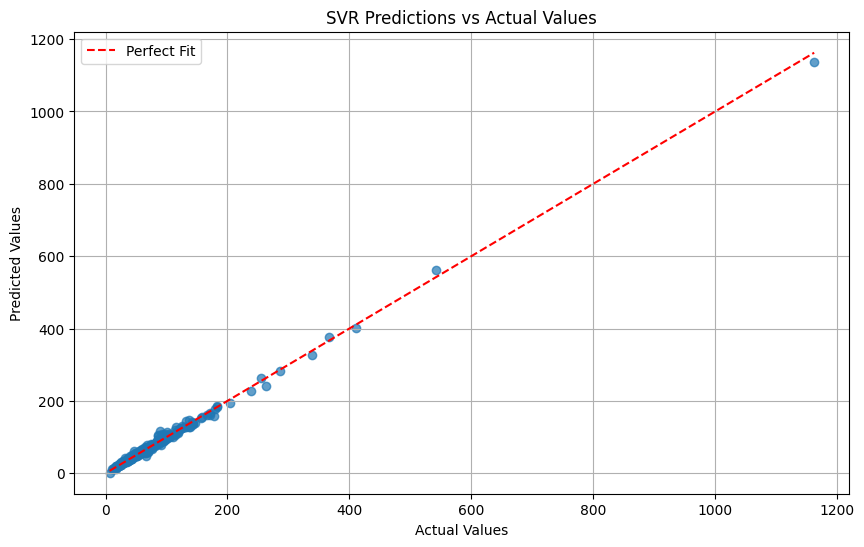

In [4]:
# Train an SVR model
# Best = 'linear'
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.1)  # You can experiment with the kernel and hyperparameters
svr_model.fit(X_train, y_train)

# Predictions on the validation set
y_pred = svr_model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error on Validation Set: {mse:.4f}")
print(f"R² Score on Validation Set: {r2:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("SVR Predictions vs Actual Values")
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'r--', label="Perfect Fit")
plt.legend()
plt.grid()
plt.show()

In [ ]:
'''
# Save the model
with open('./Models/svr.pkl', 'wb') as f:
    pickle.dump(svr_model, f)
'''